In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_excel(r"C:\Users\Saubana Dada\Documents\BMEG 570V.xlsx")

In [3]:
dataframe.columns

Index(['MMP1Multiplex', 'MMP2Multiplex', 'MMP3Multiplex', 'MMP7Multiplex',
       'MMP8Multiplex', 'MMP9Multiplex', 'TIMP1Multiplex', 'TIMP2Multiplex',
       'TIMP3Multiplex', 'TIMP4Multiplex', 'Collagen'],
      dtype='object')

In [4]:
df = dataframe.set_axis(['MMP1', 'MMP2', 'MMP3', 'MMP7', 'MMP8', 'MMP9', 'TIMP1', 'TIMP2', 'TIMP3', 'TIMP4', 'Collagen'], axis=1)

In [5]:
df

,MMP1,MMP2,MMP3,MMP7,MMP8,MMP9,TIMP1,TIMP2,TIMP3,TIMP4,Collagen
0,2.355675,363.1189,15.43329,1.158671,2.075075,85.56889,75.16355,81.73818,5.220311,0.971281,44.58


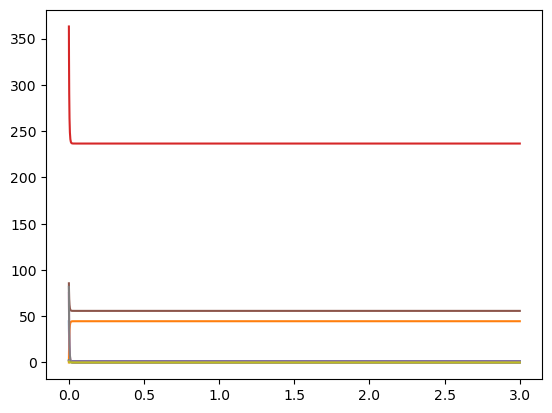

In [6]:
from scipy.integrate import solve_ivp

def odes1(t, C, K1, K2, K3, K4, K5, K6, K7, K8, K9, K10, K11, K12, K13, K14, K15, K16):
    C1, dC1, M1, M2, M8, M9, T1, T2, T4, M1_T1, M1_T2, M1_T4, M2_T1, M2_T2, M2_T4, M8_T1, M8_T2, M8_T4, M9_T1, M9_T2, M9_T4 = C  #, Cb, Cc
    dC1dt = -K1*M1*C1 - K2*M2*C1 - K3*M8*C1 - K4*M9*C1
    ddC1dt = K1*M1*C1 + K2*M2*C1 + K3*M8*C1 + K4*M9*C1
    dM1dt = -K5*M1*T1 - K6*M1*T2 - K7*M1*T4
    dM2dt = -K8*M2*T1 - K9*M2*T2 - K10*M2*T4
    dM8dt = -K11*M8*T1 - K12*M8*T2 - K13*M8*T4
    dM9dt = -K14*M9*T1 - K15*M9*T2 - K16*M9*T4
    dT1dt = -K5*M1*T1 - K8*M2*T1 - K11*M8*T1 - K14*M9*T1
    dT2dt = -K6*M1*T2 - K9*M2*T2 - K12*M8*T2 - K15*M9*T2
    dT4dt = -K7*M1*T4 - K10*M2*T4 - K13*M8*T4 - K16*M9*T4
    dM1_T1dt = K5*M1*T1
    dM1_T2dt = K6*M1*T2
    dM1_T4dt = K7*M1*T4
    dM2_T1dt = K8*M2*T1
    dM2_T2dt = K9*M2*T2
    dM2_T4dt = K10*M2*T4
    dM8_T1dt = K11*M8*T1
    dM8_T2dt = K12*M8*T2
    dM8_T4dt = K13*M8*T4
    dM9_T1dt = K14*M9*T1
    dM9_T2dt = K15*M9*T2
    dM9_T4dt = K16*M9*T4
    return [dC1dt, ddC1dt, dM1dt, dM2dt, dM8dt, dM9dt, dT1dt, dT2dt, dT4dt, dM1_T1dt, dM1_T2dt, dM1_T4dt, dM2_T1dt, dM2_T2dt, dM2_T4dt, dM8_T1dt, dM8_T2dt, dM8_T4dt, dM9_T1dt, dM9_T2dt, dM9_T4dt]

    #dCbdt = k1 * Ca - k2 * Cb
    #dCcdt = k2 * Cb
    #return [dC1dt, ddC1dt, dM1dt, dM2dt, dT1dt, dT2dt]
#C0 = [100, 0, df['MMP1'], df['MMP2'], df['MMP8'], df['MMP9'], df['TIMP1'], df['TIMP2'], df['TIMP4'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#C0 = [10, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#C0 = [100, 0, df['MMP1'][0], df['MMP2'][0], df['TIMP1'][0], df['TIMP2'][0]] #, 0.0, 0.0]
#M0 = 10
#T0 = 10
K1 = 1
K2 = 1
K3 = 1
K4 = 1
K5 = 1
K6 = 1
K7 = 1
K8 = 1
K9 = 1
K10 = 1
K11 = 1
K12 = 1
K13 = 1
K14 = 1
K15 = 1
K16 = 1

# Loop through the initial values and solve the differential equations for each set of initial values
#for i, row in df.iterrows():
#    C0 = [10, 0, row['MMP1'], row['MMP2'], row['MMP8'], row['MMP9'], row['TIMP1'], row['TIMP2'], row['TIMP4'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#    #C0 = [row['Ca'], row['Cb'], row['Cc'], 0.0]
row = df.iloc[0]
#C0 = [10, 0, row['MMP1'], row['MMP2'], row['MMP8'], row['MMP9'], row['TIMP1'], row['TIMP2'], row['TIMP4'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
C0 = [row['Collagen'], 0, row['MMP1'], row['MMP2'], row['MMP8'], row['MMP9'], row['TIMP1'], row['TIMP2'], row['TIMP4'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#C0 = [row['Ca'], row['Cb'], row['Cc'], 0.0]
sol = solve_ivp(odes1, (0, 3), C0, args=(K1, K2, K3, K4, K5, K6, K7, K8, K9, K10, K11, K12, K13, K14, K15, K16))
plt.plot(sol.t, sol.y[0], label='Collagen')
plt.plot(sol.t, sol.y[1], label='dC')
plt.plot(sol.t, sol.y[2], label='MMP1')
plt.plot(sol.t, sol.y[3], label='MMP2')
plt.plot(sol.t, sol.y[4], label='MMP8')
plt.plot(sol.t, sol.y[5], label='MMP9')
plt.plot(sol.t, sol.y[6], label='TIMP1')
plt.plot(sol.t, sol.y[7], label='TIMP2')
plt.plot(sol.t, sol.y[8], label='TIMP4')






In [9]:
K17 = 1
K18 = 1
K19 = 1
K20 = 1
K21 = 1
K22 = 1
K23 = 1
K24 = 1
K25 = 1
K26 = 1
K27 = 1
K28 = 1
K29 = 1 
K30 = 1
K31 = 1
K32 = 1
K33 = 1
K34 = 1
K35 = 1
K36 = 1
K37 = 1
K38 = 1
K39 = 1
K40 = 1
K41 = 1
K42 = 1
K43 = 1
K44 = 1
K45 = 1
K46 = 1
K47 = 1
K48 = 1
K49 = 1
K50 = 1
K51 = 1
K52 = 1
K53 = 1
K54 = 1
K55 = 1
K56 = 1
K57 = 1
K58 = 1
K59 = 1
K60 = 1
K61 = 1
K62 = 1
K63 = 1
K64 = 1


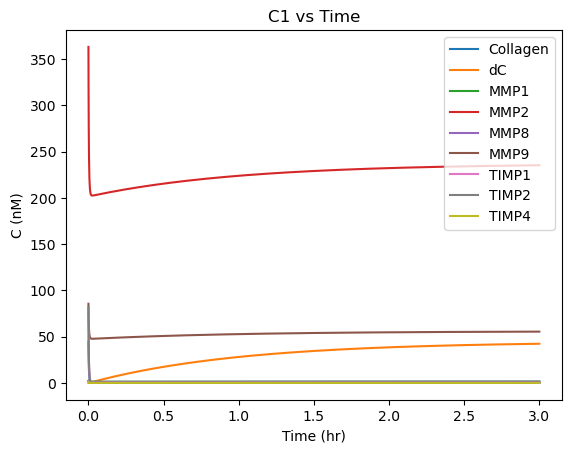

In [14]:
def odes2(t, C, K17, K18, K19, K20, K21, K22, K23, K24, K25, K26, K27, K28, K29, K30, K31, K32, K33, K34, K35, K36, K37, K38, K39, K40, K41, K42, K43, K44, K45, K46, K47, K48, K49, K50, K51, K52):
    C1, d_C1, M1, M2, M8, M9, M1_C1, M2_C1, M8_C1, M9_C1, T1, T2, T4, M1_T1, M1_T2, M1_T4, M2_T1, M2_T2, M2_T4, M8_T1, M8_T2, M8_T4, M9_T1, M9_T2, M9_T4 = C
    dC1dt = - K17*M1*C1 + K18*M1_C1 - K19*M2*C1 + K20*M2_C1 - K21*(M8)*(C1) + K22*(M8_C1) - K23*(M9)*(C1) + K24*(M9_C1)
    dd_C1dt = K25*(M1_C1) + K26*(M2_C1) + K27*(M8_C1) + K28*(M9_C1)
    dM1dt = - K17*(M1)*(C1) + K18*(M1_C1) + K25*(M1_C1) - K29*(M1)*(T1) - K31*(M1)*(T2) - K33*(M1)*(T4) + K30*(M1_T1) + K32*(M1_T2) + K34*(M1_T4)
    dM2dt = - K19*(M2)*(C1) + K20*(M2_C1) + K26*(M2_C1) - K35*(M2)*(T1) - K37*(M2)*(T2) - K39*(M2)*(T4) + K36*(M2_T1) + K38*(M2_T2) + K40*(M2_T4)
    dM8dt = - K21*(M8)*(C1) + K22*(M8_C1) + K27*(M8_C1) - K41*(M8)*(T1) - K43*(M8)*(T2) - K45*(M8)*(T4) + K42*(M8_T1) + K44*(M8_T2) + K46*(M8_T4)
    dM9dt = - K23*(M9)*(C1) + K24*(M9_C1) + K28*(M9_C1) - K47*(M9)*(T1) - K49*(M9)*(T2) - K51*(M9)*(T4) + K48*(M9_T1) + K50*(M9_T2) + K52*(M9_T4)
    dM1_C1dt = K17*(M1)*(C1) - K18*(M1_C1) - K25*(M1_C1)
    dM2_C1dt = K19*(M2)*(C1) - K20*(M2_C1) - K26*(M2_C1)
    dM8_C1dt = K21*(M8)*(C1) - K22*(M8_C1) - K27*(M8_C1)
    dM9_C1dt = K23*(M9)*(C1) - K24*(M9_C1) - K28*(M9_C1)
    dT1dt = K30*(M1_T1) - K29*(M1)*(T1) + K36*(M2_T1) - K35*(M2)*(T1) + K42*(M8_T1) - K41*(M8)*(T1) + K48*(M9_T1) - K47*(M9)*(T1)
    dT2dt = K32*(M1_T2) - K31*(M1)*(T2) + K38*(M2_T2) - K37*(M2)*(T2) + K44*(M8_T2) - K43*(M8)*(T2) + K50*(M9_T2) - K49*(M9)*(T2)
    dT4dt = K34*(M1_T4) - K33*(M1)*(T4) + K40*(M2_T4) - K39*(M2)*(T4) + K46*(M8_T4) - K45*(M8)*(T4) + K52*(M9_T4) - K51*(M9)*(T4)
    dM1_T1dt = K29*(M1)*(T1) - K30*(M1_T1)
    dM1_T2dt = K31*(M1)*(T2) - K32*(M1_T2)
    dM1_T4dt = K33*(M1)*(T4) - K34*(M1_T4)
    dM2_T1dt = K35*(M2)*(T1) - K36*(M2_T1)
    dM2_T2dt = K37*(M2)*(T2) - K38*(M2_T2)
    dM2_T4dt = K39*(M2)*(T4) - K40*(M2_T4)
    dM8_T1dt = K41*(M8)*(T1) - K42*(M8_T1)
    dM8_T2dt = K43*(M8)*(T2) - K44*(M8_T2)
    dM8_T4dt = K45*(M8)*(T4) - K46*(M8_T4)
    dM9_T1dt = K47*(M9)*(T1) - K48*(M9_T1)
    dM9_T2dt = K49*(M9)*(T2) - K50*(M9_T2)
    dM9_T4dt = K51*(M9)*(T4) - K52*(M9_T4)
    return [dC1dt, dd_C1dt, dM1dt, dM2dt, dM8dt, dM9dt, dM1_C1dt, dM2_C1dt, dM8_C1dt, dM9_C1dt, dT1dt, dT2dt, dT4dt, dM1_T1dt, dM1_T2dt, dM1_T4dt, dM2_T1dt, dM2_T2dt, dM2_T4dt, dM8_T1dt, dM8_T2dt, dM8_T4dt, dM9_T1dt, dM9_T2dt, dM9_T4dt]

# Loop through the initial values and solve the differential equations for each set of initial values
row = df.iloc[0]
C0 = [row['Collagen'], 0, row['MMP1'], row['MMP2'], row['MMP8'], row['MMP9'], 0, 0, 0, 0, row['TIMP1'], row['TIMP2'], row['TIMP4'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#C0 = [row['Ca'], row['Cb'], row['Cc'], 0.0]
sol = solve_ivp(odes2, (0, 3), C0, args=(K17, K18, K19, K20, K21, K22, K23, K24, K25, K26, K27, K28, K29, K30, K31, K32, K33, K34, K35, K36, K37, K38, K39, K40, K41, K42, K43, K44, K45, K46, K47, K48, K49, K50, K51, K52))
#plt.plot(sol.t, sol.y.T, label='Topology 2')

plt.plot(sol.t, sol.y[0], label='Collagen')
plt.plot(sol.t, sol.y[1], label='dC')
plt.plot(sol.t, sol.y[2], label='MMP1')
plt.plot(sol.t, sol.y[3], label='MMP2')
plt.plot(sol.t, sol.y[4], label='MMP8')
plt.plot(sol.t, sol.y[5], label='MMP9')
plt.plot(sol.t, sol.y[10], label='TIMP1')
plt.plot(sol.t, sol.y[11], label='TIMP2')
plt.plot(sol.t, sol.y[12], label='TIMP4')

plt.legend()
plt.xlabel('Time (hr)')
plt.ylabel('C (nM)')
plt.title('C1 vs Time')
plt.show()

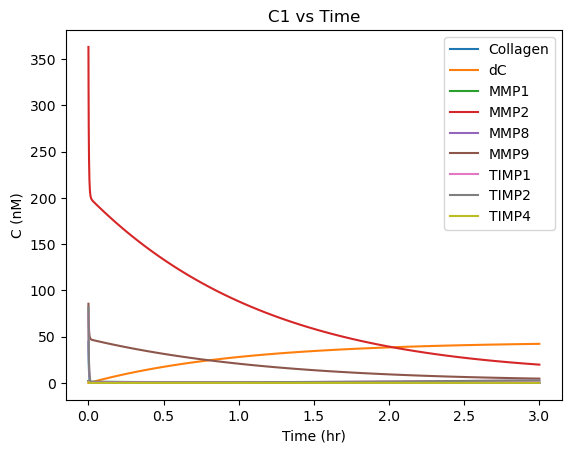

In [16]:
def odes3(t, C, K17, K18, K19, K20, K21, K22, K23, K24, K25, K26, K27, K28, K29, K30, K31, K32, K33, K34, K35, K36, K37, K38, K39, K40, K41, K42, K43, K44, K45, K46, K47, K48, K49, K50, K51, K52, K53, K54, K55, K56, K57, K58, K59):
    C1, d_C1, M1, M2, M8, M9, M1_C1, M2_C1, M8_C1, M9_C1, iM1, iM2, iM8, iM9, T1, T2, T4, M1_T1, M1_T2, M1_T4, M2_T1, M2_T2, M2_T4, M8_T1, M8_T2, M8_T4, M9_T1, M9_T2, M9_T4, iT1, iT2, iT4 = C
    dC1dt = - K17*M1*C1 + K18*M1_C1 - K19*M2*C1 + K20*M2_C1 - K21*(M8)*(C1) + K22*(M8_C1) - K23*(M9)*(C1) + K24*(M9_C1)
    dd_C1dt = K25*(M1_C1) + K26*(M2_C1) + K27*(M8_C1) + K28*(M9_C1)
    dM1dt = - K17*(M1)*(C1) + K18*(M1_C1) + K25*(M1_C1) - K29*(M1)*(T1) - K31*(M1)*(T2) - K33*(M1)*(T4) + K30*(M1_T1) + K32*(M1_T2) + K34*(M1_T4) - K53*M1
    dM2dt = - K19*(M2)*(C1) + K20*(M2_C1) + K26*(M2_C1) - K35*(M2)*(T1) - K37*(M2)*(T2) - K39*(M2)*(T4) + K36*(M2_T1) + K38*(M2_T2) + K40*(M2_T4) - K54*M2
    dM8dt = - K21*(M8)*(C1) + K22*(M8_C1) + K27*(M8_C1) - K41*(M8)*(T1) - K43*(M8)*(T2) - K45*(M8)*(T4) + K42*(M8_T1) + K44*(M8_T2) + K46*(M8_T4) - K55*M8
    dM9dt = - K23*(M9)*(C1) + K24*(M9_C1) + K28*(M9_C1) - K47*(M9)*(T1) - K49*(M9)*(T2) - K51*(M9)*(T4) + K48*(M9_T1) + K50*(M9_T2) + K52*(M9_T4) - K56*M9
    dM1_C1dt = K17*(M1)*(C1) - K18*(M1_C1) - K25*(M1_C1)
    dM2_C1dt = K19*(M2)*(C1) - K20*(M2_C1) - K26*(M2_C1)
    dM8_C1dt = K21*(M8)*(C1) - K22*(M8_C1) - K27*(M8_C1)
    dM9_C1dt = K23*(M9)*(C1) - K24*(M9_C1) - K28*(M9_C1)
    diM1dt =  K53*(M1)
    diM2dt =  K54*(M2)
    diM8dt =  K55*(M8)
    diM9dt =  K56*(M9)
    dT1dt = K30*(M1_T1) - K29*(M1)*(T1) + K36*(M2_T1) - K35*(M2)*(T1) + K42*(M8_T1) - K41*(M8)*(T1) + K48*(M9_T1) - K47*(M9)*(T1) - K57*T1
    dT2dt = K32*(M1_T2) - K31*(M1)*(T2) + K38*(M2_T2) - K37*(M2)*(T2) + K44*(M8_T2) - K43*(M8)*(T2) + K50*(M9_T2) - K49*(M9)*(T2) - K58*T2
    dT4dt = K34*(M1_T4) - K33*(M1)*(T4) + K40*(M2_T4) - K39*(M2)*(T4) + K46*(M8_T4) - K45*(M8)*(T4) + K52*(M9_T4) - K51*(M9)*(T4) - K59*T4
    dM1_T1dt = K29*(M1)*(T1) - K30*(M1_T1)
    dM1_T2dt = K31*(M1)*(T2) - K32*(M1_T2)
    dM1_T4dt = K33*(M1)*(T4) - K34*(M1_T4)
    dM2_T1dt = K35*(M2)*(T1) - K36*(M2_T1)
    dM2_T2dt = K37*(M2)*(T2) - K38*(M2_T2)
    dM2_T4dt = K39*(M2)*(T4) - K40*(M2_T4)
    dM8_T1dt = K41*(M8)*(T1) - K42*(M8_T1)
    dM8_T2dt = K43*(M8)*(T2) - K44*(M8_T2)
    dM8_T4dt = K45*(M8)*(T4) - K46*(M8_T4)
    dM9_T1dt = K47*(M9)*(T1) - K48*(M9_T1)
    dM9_T2dt = K49*(M9)*(T2) - K50*(M9_T2)
    dM9_T4dt = K51*(M9)*(T4) - K52*(M9_T4)
    diT1dt = K57*(T1)
    diT2dt = K58*(T2)
    diT4dt = K59*(T4)
    return [dC1dt, dd_C1dt, dM1dt, dM2dt, dM8dt, dM9dt, dM1_C1dt, dM2_C1dt, dM8_C1dt, dM9_C1dt, diM1dt, diM2dt, diM8dt, diM9dt, dT1dt, dT2dt, dT4dt, dM1_T1dt, dM1_T2dt, dM1_T4dt, dM2_T1dt, dM2_T2dt, dM2_T4dt, dM8_T1dt, dM8_T2dt, dM8_T4dt, dM9_T1dt, dM9_T2dt, dM9_T4dt, diT1dt, diT2dt, diT4dt]

# Loop through the initial values and solve the differential equations for each set of initial values
row = df.iloc[0]
C0 = [row['Collagen'], 0, row['MMP1'], row['MMP2'], row['MMP8'], row['MMP9'], 0, 0, 0, 0, 0, 0, 0, 0, row['TIMP1'], row['TIMP2'], row['TIMP4'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#C0 = [row['Ca'], row['Cb'], row['Cc'], 0.0]
sol = solve_ivp(odes3, (0, 3), C0, args=(K17, K18, K19, K20, K21, K22, K23, K24, K25, K26, K27, K28, K29, K30, K31, K32, K33, K34, K35, K36, K37, K38, K39, K40, K41, K42, K43, K44, K45, K46, K47, K48, K49, K50, K51, K52, K53, K54, K55, K56, K57, K58, K59))

plt.plot(sol.t, sol.y[0], label='Collagen')
plt.plot(sol.t, sol.y[1], label='dC')
plt.plot(sol.t, sol.y[2], label='MMP1')
plt.plot(sol.t, sol.y[3], label='MMP2')
plt.plot(sol.t, sol.y[4], label='MMP8')
plt.plot(sol.t, sol.y[5], label='MMP9')
plt.plot(sol.t, sol.y[14], label='TIMP1')
plt.plot(sol.t, sol.y[15], label='TIMP2')
plt.plot(sol.t, sol.y[16], label='TIMP4')

plt.legend()
plt.xlabel('Time (hr)')
plt.ylabel('C (nM)')
plt.title('C1 vs Time')
plt.show()
